# Coding KMeans from scratch  
Now practically speaking, you should almost never code these things by yourself. There are functions and modules available to you through trusted sources with these models that have been tried, tested and improved by many many many people so it's better to use that code (also if something is wrong, you can rest assured that it wasn't your fault ;) )  


Okay, then why are we coding this? Well, this will be a good way to summarize what we have learnt so far in the course. Coding a KMeans requires quite a bit of problem-solving, and thinking about how you can get your code to do what you want based on what you've learnt so far. Since we want to test our hand at everything, we are going to try and code *everything* ourselves - this of course, does mean that it won't be perfect, but it'll be something!  


## So lets think about how a KMeans works and what components we need to code  
KMeans needs data and centroids and the distance between the centroids and based on those distances it defines clusters. This is essentially how it works, so we see that there are 4 functions that we need to create:  
1. A function that between every point and every centroid  
2. A function that takes in the distances from 1 and finds the closest centroid for each point  
3. A function that defines the clusters, gets the means for each and uses them to find new centroids  
4. A function that puts everything together and gives us the final output  


So let's get started - we are going to use one cell at a time and test our function with toy data before using actual data.  

In [14]:
## import our libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [15]:
# let's get some data

data = np.random.rand(100, 3)

print(data.shape)

(100, 3)


In [17]:
# initialize some centroids - say we want 2 clusters
np.random.seed(123) # set the seed

idx = np.random.choice(range(0, data.shape[0]), 2)

print(idx)

init_centroids = data[idx, :]

init_centroids.shape

[66 92]


(2, 3)

In [23]:
# for the first point

def point_to_centroid_distance(point,centroid):
    """Calculates the Euclidean distance between a data point
    and a cluster centroid. Point and centroid are numpy arrays."""
    distance = np.sqrt((np.subtract(point, centroid)**2).sum())
    
    return distance


In [24]:
# test

point_to_centroid_distance(data[1,:], init_centroids[1,:])

0.47700133124012795

In [34]:
 # for the second point
def find_closest_centroid(data, c, k):
    """Finds the closest centroid and returns a list ordered by which sample
    got assigned to which cluster.
    data: np.array of shape (n_samples, n_features)
    """
    assigned_cluster = []
    n_samples = data.shape[0]
    for i in range(n_samples):
        distance = []
        for j in range(k):
            dist_p_to_c = point_to_centroid_distance(data[i, :], c[j, :])
            distance.append(dist_p_to_c)
            
        assigned_cluster.append(np.argmin(distance))
            
    return assigned_cluster

    

In [36]:
# test

lst = find_closest_centroid(data, init_centroids, 2)
lst[0:10]

[1, 1, 1, 1, 0, 0, 1, 1, 1, 0]

In [51]:
# for the third point

def get_new_centroids(clusters_lst, data, k):
    """Gets the new centroids by calculating the mean of the current clusters. This function assumes that data points follow the same order in data and clusters_lst.
    """
    new_centroids = []
    
    new_df = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters_lst, columns=['cluster'])], axis =1)
    
    for c in new_df['cluster'].unique():
        
        current_cluster = new_df[new_df['cluster'] == c].iloc[:, :-1]
        cluster_mean = current_cluster.mean(axis=0)
        
        new_centroids.append(cluster_mean)
    
  
    return np.array(new_centroids).reshape([k, -1])
    

In [52]:
# test

get_new_centroids(lst, data, 2).shape

(2, 3)

In [53]:
# putting it all together

def kmeans(data, k, c, n_iter):
    """Runs the K means algorithm given the data, a number of clusters k,
    an initialization for centroids, c (as a np.ndarray) and the number
    of iterations, n_iter."""
    for i in range(n_iter):
        cluster_ids = find_closest_centroid(data, c, k)
        c = get_new_centroids(cluster_ids, data, k)
        
    return c
        
    

In [54]:
# test

final_centroids = kmeans(data, 2, init_centroids, 5)

new_lst = find_closest_centroid(data, final_centroids, 2)

In [55]:
new_lst == lst # test if the final cluster assignment is different from the first one

False

Now lets work with some real data, we're going to use `sample_data.tsv` that we used before

In [56]:
data_file = pd.read_csv("sample_data.tsv", sep='\t')

data_file.head()

,Sample_name,Betacatenin,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,...,Vimentin,cPARPcCasp3,mTOR,p53,pERK12,pHH3,pS6,panCK,vWFCD31,ER_status
0,MB0000_1_527,0.257119,0.099919,0.053080,0.068505,1.538144,0.237508,0.308845,0.041682,0.202937,...,0.236465,0.652936,0.127962,0.047303,0.147692,0.125508,0.079349,0.304568,0.328876,pos
1,MB0002_1_345,0.430766,0.165873,0.096097,0.044206,1.876108,0.116108,0.077916,0.051861,0.799009,...,0.083412,0.800771,0.219092,0.083990,0.154308,0.225958,0.339222,1.398314,0.324076,pos
2,MB0005_1_211,0.663028,0.366170,0.151895,0.094433,1.898584,0.255871,0.230951,0.072975,0.559487,...,0.151438,1.375195,0.351046,0.127931,0.578319,0.383990,0.268074,2.224326,0.754883,pos
3,MB0010_1_420,0.686098,0.345356,0.174362,0.115452,1.565233,0.219034,0.116244,0.094914,0.153581,...,0.158320,1.194323,0.320252,0.137204,0.128519,0.333312,0.282119,0.485657,0.518680,pos
4,MB0013_1_371,0.603125,0.483254,0.301242,0.132543,2.876632,0.315426,0.137286,0.118034,0.578791,...,0.061375,1.350407,0.390461,0.173882,0.189328,0.342457,0.248364,1.554852,0.627247,pos


In [57]:
## select the fields we care about and convert to numpy

data = data_file.iloc[:, 1:-1]

data.head() #check

,Betacatenin,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,CK5,...,Twist,Vimentin,cPARPcCasp3,mTOR,p53,pERK12,pHH3,pS6,panCK,vWFCD31
0,0.257119,0.099919,0.053080,0.068505,1.538144,0.237508,0.308845,0.041682,0.202937,0.258949,...,0.094359,0.236465,0.652936,0.127962,0.047303,0.147692,0.125508,0.079349,0.304568,0.328876
1,0.430766,0.165873,0.096097,0.044206,1.876108,0.116108,0.077916,0.051861,0.799009,0.311770,...,0.168792,0.083412,0.800771,0.219092,0.083990,0.154308,0.225958,0.339222,1.398314,0.324076
2,0.663028,0.366170,0.151895,0.094433,1.898584,0.255871,0.230951,0.072975,0.559487,0.439992,...,0.380864,0.151438,1.375195,0.351046,0.127931,0.578319,0.383990,0.268074,2.224326,0.754883
3,0.686098,0.345356,0.174362,0.115452,1.565233,0.219034,0.116244,0.094914,0.153581,0.368934,...,0.296349,0.158320,1.194323,0.320252,0.137204,0.128519,0.333312,0.282119,0.485657,0.518680
4,0.603125,0.483254,0.301242,0.132543,2.876632,0.315426,0.137286,0.118034,0.578791,0.354976,...,0.353776,0.061375,1.350407,0.390461,0.173882,0.189328,0.342457,0.248364,1.554852,0.627247


In [58]:
data = data.to_numpy()

data.shape

(100, 37)

In [59]:
scaled_data = StandardScaler().fit_transform(data) # standardize the features

In [60]:
## run the KMeans
np.random.seed(123) # set the seed

k=2 # two clusters

idx = np.random.choice(range(0, scaled_data.shape[0]), k)

print(idx)

init_centroids = scaled_data[idx, :]

init_centroids.shape

[66 92]


(2, 37)

In [61]:
final_centroids = kmeans(scaled_data, k, init_centroids, 10)

new_lst = find_closest_centroid(scaled_data, final_centroids, k)

In [62]:
df = pd.DataFrame(scaled_data, columns=data_file.columns[1:-1])

df['cluster'] = new_lst

df.head()

,Betacatenin,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,CK5,...,Vimentin,cPARPcCasp3,mTOR,p53,pERK12,pHH3,pS6,panCK,vWFCD31,cluster
0,-2.003348,-0.994801,-1.523664,-0.878649,-1.439749,-0.261637,0.598788,-0.463465,-0.843580,-1.029058,...,-0.207388,-2.552512,-2.439835,-1.195129,-0.644800,-1.944951,-1.498670,-1.623853,-1.673807,0
1,-0.700250,-0.776510,-0.926366,-1.262557,-0.721069,-1.238664,-1.260134,-0.408238,1.166965,-0.715432,...,-1.254476,-1.742643,-1.117297,-0.724110,-0.575731,-0.622247,-0.077890,0.694143,-1.712515,0
2,1.042712,-0.113577,-0.151612,-0.469030,-0.673274,-0.113849,-0.028240,-0.293683,0.359060,0.045876,...,-0.789085,1.404150,0.797718,-0.159939,3.850790,1.458667,-0.466872,2.444725,1.761364,1
3,1.215837,-0.182464,0.160338,-0.136950,-1.382146,-0.410316,-0.951601,-0.174649,-1.010058,-0.376031,...,-0.742002,0.413305,0.350813,-0.040881,-0.844964,0.791362,-0.390084,-1.240067,-0.143292,1
4,0.593182,0.273943,1.922053,0.133071,1.406546,0.365448,-0.782217,-0.049204,0.424174,-0.458903,...,-1.405235,1.268361,1.369736,0.430029,-0.210137,0.911772,-0.574630,1.025896,0.732152,1


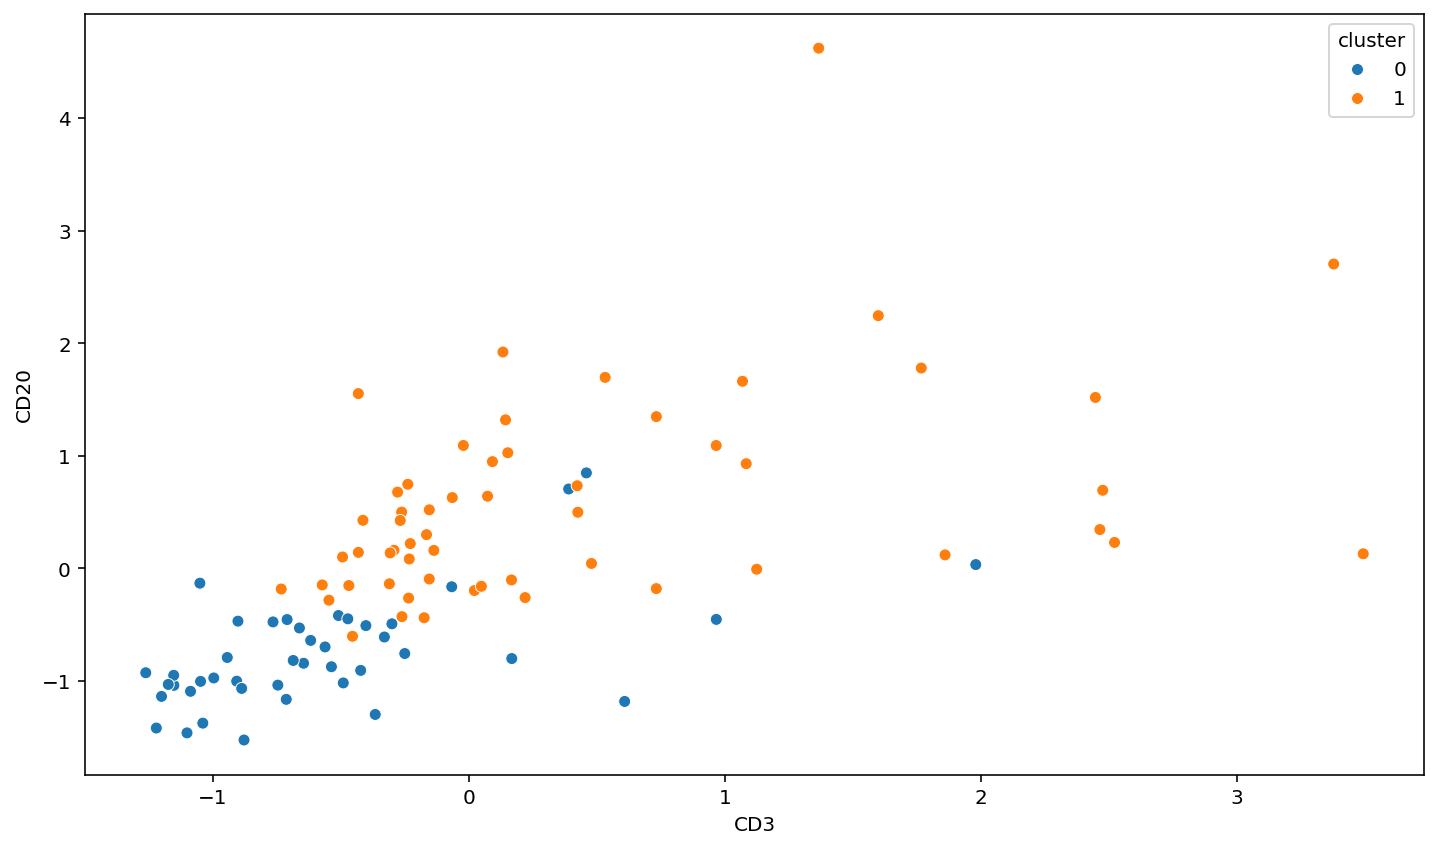

In [63]:
# lets see what our clusters look like 


sns.scatterplot(df, x='CD3', y='CD20', hue='cluster');